# Classical Planners

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WoodOxen/tactics2d/blob/master/docs/tutorial/classical_planner_demo.ipynb)

This notebook demonstrates how to use the classical planners provided in Tactics2D, including Dijkstra, A*, Hybrid A*, D*, RRT, RRT*, MCT. First we will briefly introduce the planners, then we will show the use cases.

In [1]:
# If you are using colab, install the released version.
# %%capture
# !pip install tactics2d

In [2]:
# If you are running this notebook locally, use this block.
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '../../'))

In [3]:
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import LineString

from tactics2d.planner import RRT, RRTStar, MCTS
from tactics2d.map.generator import ParkingLotGenerator
from tactics2d.map.element import Map

In [4]:
map_generator = ParkingLotGenerator()
map_ = Map()
start_state, target_area, target_heading = map_generator.generate(map_)
obstacles = map_.areas
bounds = map_.boundary

## Performance without Consideration of Physics

### RRT and RRT*

In [5]:
def collide_fn(start, target, obstacles):
    line = LineString([start, target])
    for obstacle in obstacles.values():
        if line.intersects(obstacle.geometry):
            return True

    return False

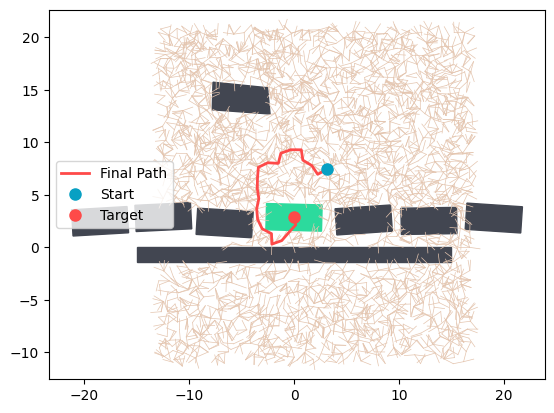

In [6]:
start = [start_state.x, start_state.y]
target = shapely.centroid(target_area.geometry)
target = [target.x, target.y]

rrt = RRT(max_iter=50000, step_size=1.0)
final_path, tree = rrt.plan(start, target, bounds, obstacles, collide_fn)

fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[2], bounds[3])

for obstacle in obstacles.values():
    ax.add_patch(
        Polygon(obstacle.shape(outer_only=True), color="#424651" if obstacle.type_ == "obstacle" else "#2CDA9D")
    )

for (x, y, parent) in tree:
    if parent is not None:
        px, py, _ = tree[parent]
        ax.plot([x, px], [y, py], linewidth=0.5, color="#E4C5AF")

if final_path:
    xs, ys = zip(*final_path)
    ax.plot(xs, ys, "-", linewidth=2, label="Final Path", color="#FE4A49")

ax.plot(start[0], start[1], "o", markersize=8, label="Start", color="#07A0C3")
ax.plot(target[0], target[1], "o", markersize=8, label="Target", color="#FE4A49")

ax.legend('upper right')
plt.axis('equal')
plt.show()

/home/rowena/miniconda3/envs/tactics2d/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


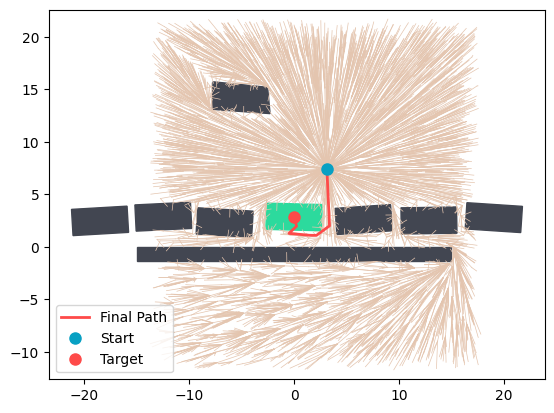

In [7]:
start = [start_state.x, start_state.y]
target = shapely.centroid(target_area.geometry)
target = [target.x, target.y]

rrt_star = RRTStar(max_iter=10000, step_size=1.0, radius=3.0)
final_path, tree = rrt_star.plan(start, target, bounds, obstacles, collide_fn)

fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[2], bounds[3])

for obstacle in obstacles.values():
    ax.add_patch(
        Polygon(obstacle.shape(outer_only=True), color="#424651" if obstacle.type_ == "obstacle" else "#2CDA9D")
    )

for (x, y, parent, cost) in tree:
    if parent is not None:
        px, py, _, _ = tree[parent]
        ax.plot([x, px], [y, py], linewidth=0.5, color="#E4C5AF")

if final_path:
    xs, ys = zip(*final_path)
    ax.plot(xs, ys, "-", linewidth=2, label="Final Path", color="#FE4A49")

ax.plot(start[0], start[1], "o", markersize=8, label="Start", color="#07A0C3")
ax.plot(target[0], target[1], "o", markersize=8, label="Target", color="#FE4A49")

ax.legend('upper right')
plt.axis('equal')
plt.show()